In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

C:\Users\saika\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
warnings.simplefilter(action='ignore',category=FutureWarning)

In [3]:
data=pd.read_csv('IRIS.csv')

In [4]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
data['species'].value_counts

<bound method IndexOpsMixin.value_counts of 0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object>

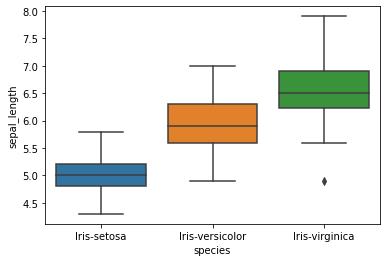

In [9]:
sns.boxplot(x='species',y='sepal_length',data=data)
plt.show()

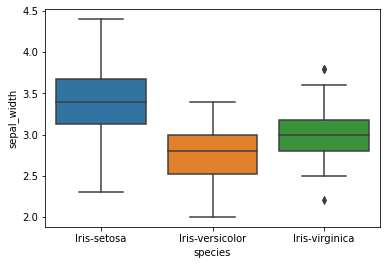

In [10]:
sns.boxplot(x='species',y='sepal_width',data=data)
plt.show()

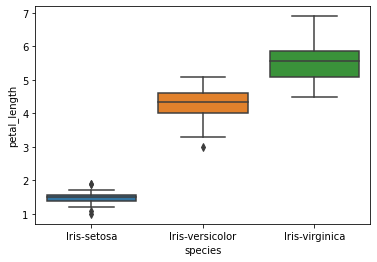

In [11]:
sns.boxplot(x='species',y='petal_length',data=data)
plt.show()

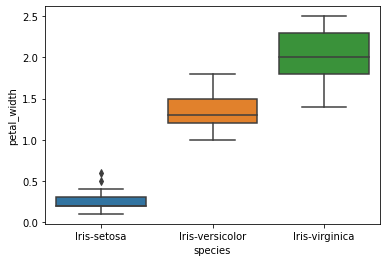

In [12]:
sns.boxplot(x='species',y='petal_width',data=data)
plt.show()

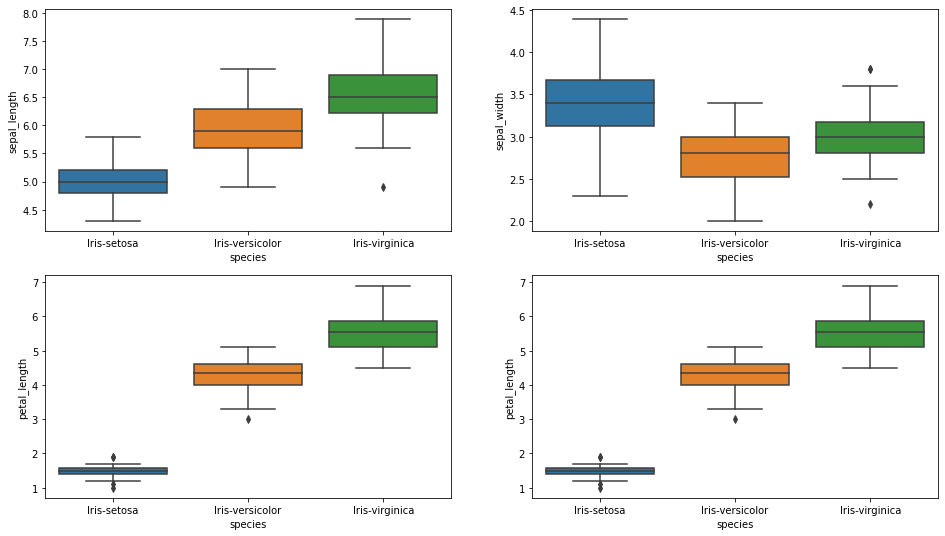

In [13]:
#all these features placed in one plot
fig,axes=plt.subplots(2,2,figsize=(16,9))
sns.boxplot(ax=axes[0,0],data=data,x='species',y='sepal_length')
sns.boxplot(ax=axes[0,1],data=data,x='species',y='sepal_width')
sns.boxplot(ax=axes[1,0],data=data,x='species',y='petal_length')
sns.boxplot(ax=axes[1,1],data=data,x='species',y='petal_length')
plt.show()

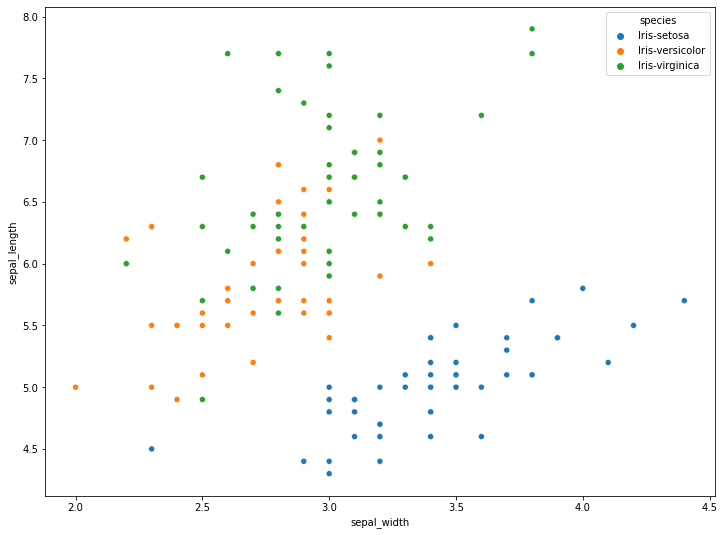

In [14]:
plt.figure(figsize=(12,9))
sns.scatterplot(x='sepal_width',y='sepal_length',data=data,hue='species')#hue=color
plt.show()

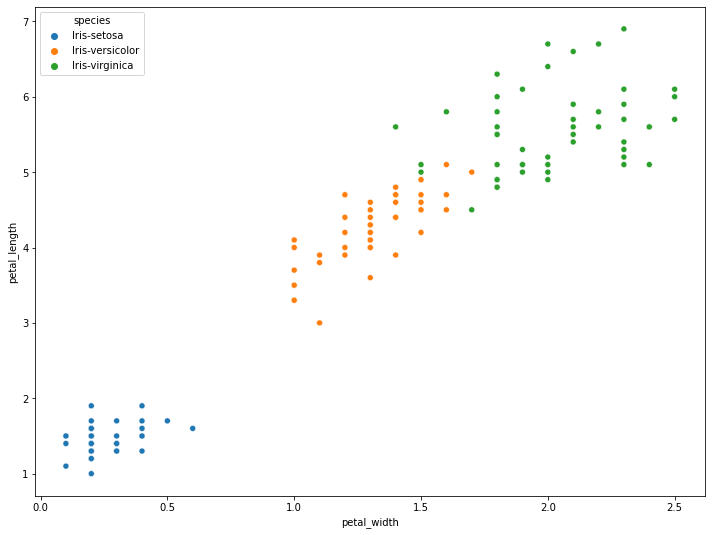

In [15]:
plt.figure(figsize=(12,9))
sns.scatterplot(x='petal_width',y='petal_length',hue='species',data=data)
plt.show()

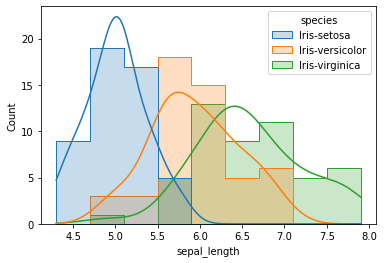

In [16]:
sns.histplot(x='sepal_length',hue='species',data=data,kde=True,element='step')
plt.show()

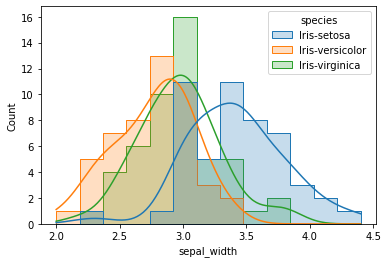

In [17]:
sns.histplot(x='sepal_width',hue='species',kde=True,element='step',data=data)
plt.show()

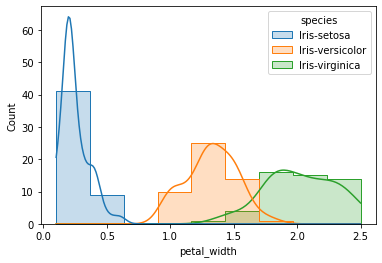

In [18]:
sns.histplot(x='petal_width',hue='species',kde=True,element='step',data=data)
plt.show()

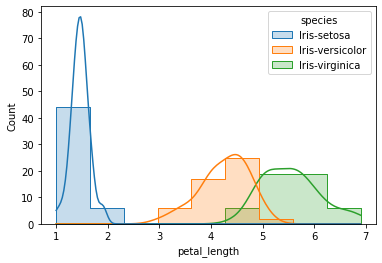

In [19]:
sns.histplot(x='petal_length',hue='species',kde=True,element='step',data=data)
plt.show()

In [22]:
#model training using logistic regression
x=data.iloc[:,:-1]
y=data.iloc[:,-1]


In [23]:
x


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [24]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [26]:
from sklearn.model_selection import train_test_split
x_test,x_train,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [28]:
x_test.shape,x_train.shape,y_train.shape,y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [31]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()

In [33]:
KNN.fit(x_train,y_test)

KNeighborsClassifier()

In [34]:
pred=KNN.predict(x_test)

In [35]:
pred

array(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris

In [42]:
from sklearn.metrics import classification_report,confusion_matrix

In [43]:
print(classification_report(y_train,pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        36
Iris-versicolor       0.78      0.97      0.86        39
 Iris-virginica       0.97      0.76      0.85        45

       accuracy                           0.90       120
      macro avg       0.92      0.91      0.90       120
   weighted avg       0.92      0.90      0.90       120



In [45]:
print(confusion_matrix(y_train,pred))

[[36  0  0]
 [ 0 38  1]
 [ 0 11 34]]
